In [131]:
import pandas as pd 
from plotnine import ggplot
import numpy as np
from plotnine import *
import matplotlib.pyplot as plt

In [132]:
# import the raw data
df = pd.read_csv('tmdb_raw_data.csv')
df = df.drop('Unnamed: 0', axis='columns')
df

,title,director,year,genre,revenue,user_rating,length,source,votes
0,The Godfather,Francis Ford Coppola,1972,"['Drama', 'Crime']",245.066411,87.00,175,TMDB,10000+ ratings
1,The Shawshank Redemption,Frank Darabont,1994,"['Drama', 'Crime']",28.341469,87.01,142,TMDB,10000+ ratings
2,The Godfather Part II,Francis Ford Coppola,1974,"['Drama', 'Crime']",102.600000,86.00,202,TMDB,10000+ ratings
3,Dilwale Dulhania Le Jayenge,Aditya Chopra,1995,"['Comedy', 'Drama', 'Romance']",100.000000,85.71,190,TMDB,2500+ ratings
4,Schindler's List,Steven Spielberg,1993,"['Drama', 'History', 'War']",321.365567,85.70,195,TMDB,10000+ ratings
...,...,...,...,...,...,...,...,...,...
245,"Toto, Peppino, and the Hussy",Camillo Mastrocinque,1956,"['Comedy', 'Romance']",NaN,80.60,101,TMDB,250+ ratings
246,The Best of Youth,Marco Tullio Giordana,2003,"['Drama', 'History', 'Romance']",2.693053,80.60,366,TMDB,250+ ratings
247,El mesero,Raúl Martínez,2021,Comedy,NaN,80.59,86,TMDB,250+ ratings
248,The Elephant Man,David Lynch,1980,"['Drama', 'History']",26.010864,81.00,124,TMDB,2500+ ratings


In [194]:
# import data separated by genre
df_sep_genre = pd.read_csv('tmdb_genre_sep.csv')
df_sep_genre = df_sep_genre.drop('Unnamed: 0', axis='columns')

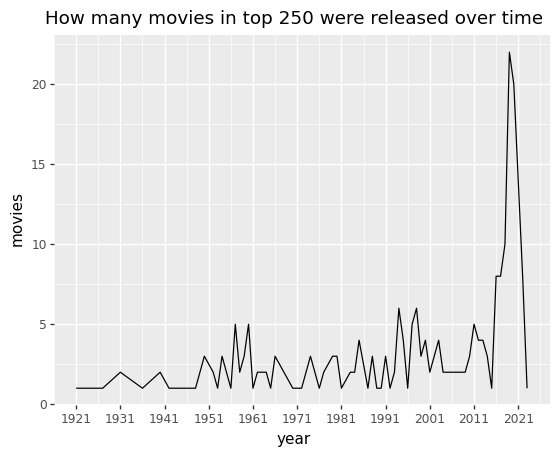

<ggplot: (8784863276626)>

In [134]:
# when were the top 250 TMDB films released?
year_df = df.groupby('year')['title'].count().reset_index(inplace=False, drop=False)
year_df['year'] = year_df['year'].astype(int)
year_df['title'].astype(int)
year_df

(
    ggplot(year_df)
    + geom_line(aes(x='year', y='title', group=1))
    +labs(x='year', y='movies')
    + scale_x_continuous(breaks=range(1921, 2023, 10))
    + ggtitle('How many movies in top 250 were released over time')
)

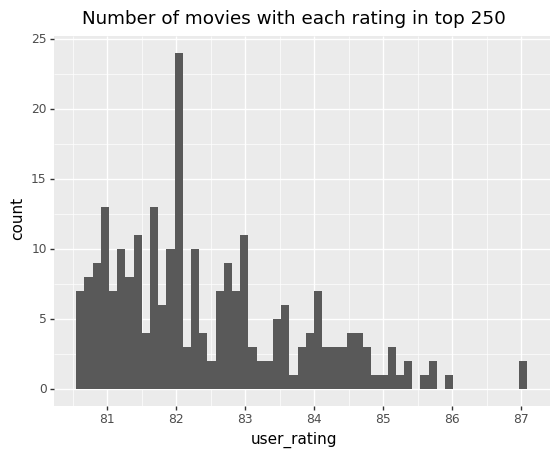

<ggplot: (8784844568890)>

In [135]:
# How many movies with a specific rating in TMDB
ggplot(df) + aes(x="user_rating") + stat_bin(bins=55) + geom_bar() + ggtitle('Number of movies with each rating in top 250') + scale_x_continuous(breaks=range(81, 100, 1)) + scale_y_continuous(breaks=range(0, 80, 5))

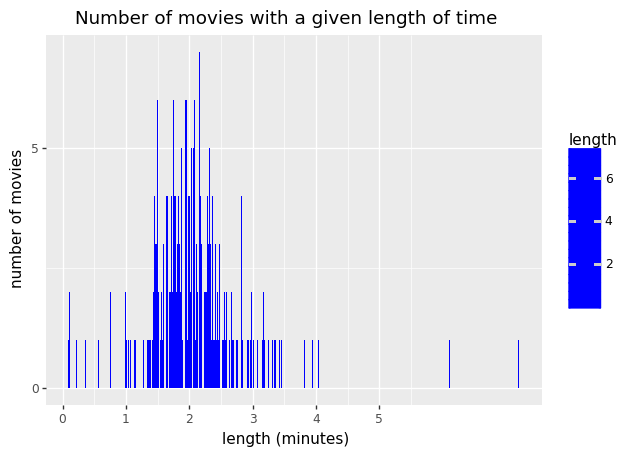

<ggplot: (8784863289079)>

In [136]:
length_df = df.groupby('length')['title'].count().reset_index(inplace=False, drop=False)
length_df['length'] = length_df['length'].astype(int) / 60
(
    ggplot(length_df, aes(x='length', y='title', fill='length'))
    + geom_bar(stat='identity')
    +labs(x='length (minutes)', y='number of movies')
    #+labs(x='rating')
    + scale_x_continuous(breaks=list(range(0, 6, 1)))
    + scale_y_continuous(breaks=range(0, 200, 5))
    + scale_fill_gradient(low='blue', high='blue')
    + ggtitle('Number of movies with a given length of time')
)

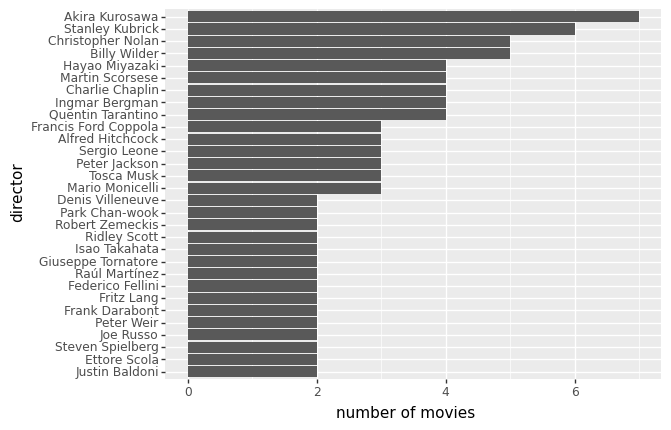

<ggplot: (8784879155496)>

In [199]:
# Which 30 directors had the most number of movies in the top 250
df_sep_directors = pd.read_csv('tmb_dir_sep.csv') # import data separated by genre
director_count_df = df_sep_directors.groupby('director')['title'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)
df_top_30_directors = director_count_df.head(30).sort_values('title', ascending=False)
df_top_30_directors['director'] = pd.Categorical(df_top_30_directors['director'], categories=df_top_30_directors['director'][::-1])
ggplot(df_top_30_directors, aes(x='director', y='title'))+ \
geom_bar(stat='identity') + \
labs(x='director', y='number of movies')  + \
coord_flip() + \
scale_x_discrete()

At the bottom half, many directors had just 2 movies, which means some others were excluded from the list, despite having done the same number of movies.

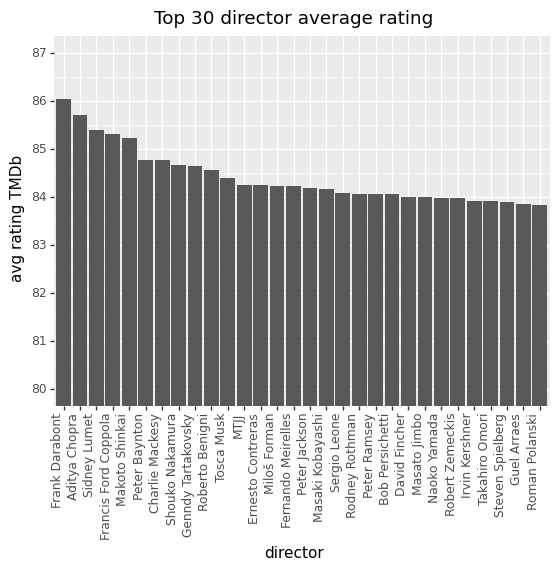

<ggplot: (8784829679243)>

In [138]:
# top 30 directors in terms of average rating
director_avg_rating_df = df_sep_directors.groupby('director')['user_rating'].mean().sort_values(ascending=False).head(30).reset_index(drop=False, inplace=False)
director_avg_rating_df['user_rating'] = director_avg_rating_df['user_rating'].astype(float)



ggplot(director_avg_rating_df, aes(x='director', y='user_rating'))+ \
geom_bar(stat='identity') + \
labs(x='director', y='avg rating TMDb')  + \
coord_flip() + \
scale_y_continuous(breaks=range(70, 100, 1)) + \
coord_cartesian(ylim=(80, 87)) + \
scale_x_discrete(limits=director_avg_rating_df['director'][director_avg_rating_df['user_rating'] >= 0].tolist()) + \
theme(axis_text_x=element_text(rotation=90, hjust=1)) + \
ggtitle('Top 30 director average rating')

/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/1719179817.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/1719179817.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


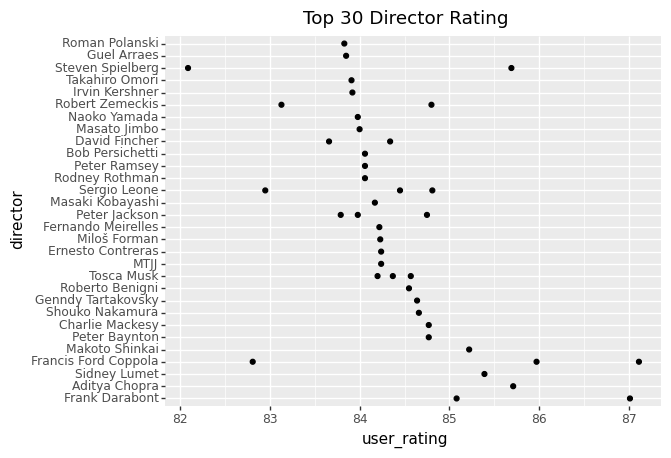

<ggplot: (8784878450878)>

In [139]:
# Rating plots of the top 30 directors
(df_sep_directors.groupby(['director']).mean().sort_values(['user_rating'], ascending=False)).index.to_list()
director_r_list = ((df_sep_directors.groupby(['director']).mean().sort_values(['user_rating'], ascending=False)).index.to_list())[:30]
director_r_cat = pd.Categorical(df_sep_directors['director'], categories=director_r_list)
df_rating = df_sep_directors.assign(director_r_cat=director_r_cat)
ggplot(df_rating.dropna(subset='director_r_cat')) + aes(x="director_r_cat", y="user_rating") + geom_point() + coord_flip() + scale_x_discrete() + labs(x='director') + ggtitle('Top 30 Director Rating')

/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/520949306.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/520949306.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/520949306.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/

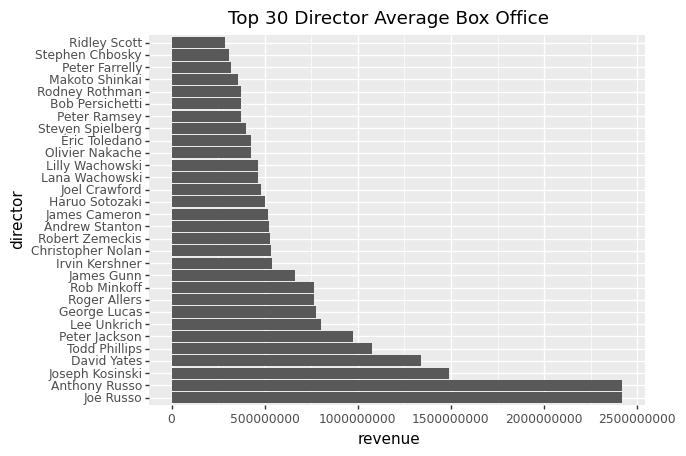

<ggplot: (8784844769293)>

In [140]:
# How much revenue the top 30 directors made
(df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list()
director_bo_list = ((df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list())[:30]
director_bo_cat = (pd.Categorical(((df_sep_directors.groupby(['director']).mean()).reset_index(inplace=False))['director'], categories=director_bo_list))
df_bo = (df_sep_directors.groupby(['director']).mean()).assign(director_bo_cat=director_bo_cat)
ggplot(df_bo.dropna(subset='director_bo_cat'), aes(x='director_bo_cat', y='revenue')) + geom_bar(stat='identity') + coord_flip() +labs(x='director') + ggtitle('Top 30 Director Average Box Office')

/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/750275442.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/750275442.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


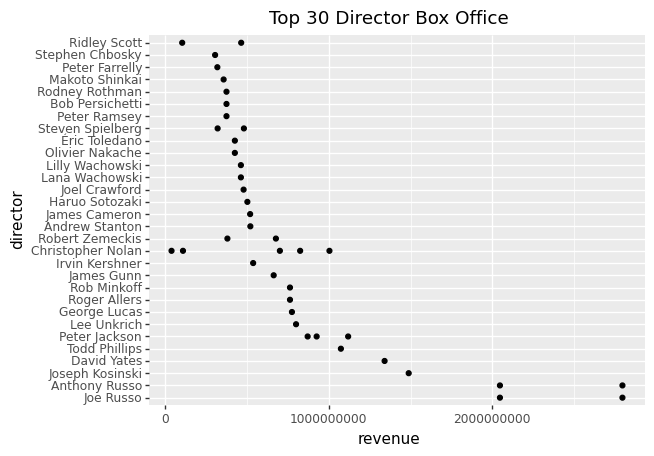

<ggplot: (8784879435876)>

In [141]:
# Revenue plots of top 30 directors
(df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list()
director_bo_list = ((df_sep_directors.groupby(['director']).mean().sort_values(['revenue'], ascending=False)).index.to_list())[:30]
director_bo_cat = pd.Categorical(df_sep_directors['director'], categories=director_bo_list)
df_bo = df_sep_directors.assign(director_bo_cat=director_bo_cat)
ggplot(df_bo.dropna(subset='director_bo_cat')) + aes(x='director_bo_cat', y='revenue') + geom_point() + coord_flip() +labs(x='director') + ggtitle('Top 30 Director Box Office')

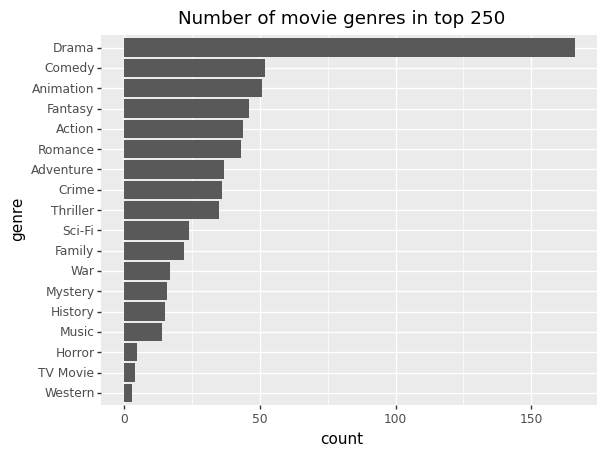

<ggplot: (8784830439777)>

In [142]:
# How many movies of each genre in TMDB
genre_list = df_sep_genre['genre'].value_counts().index.to_list()[::-1]
genre_cat = pd.Categorical(df_sep_genre['genre'], categories=genre_list)
df_sg = df_sep_genre.assign(genre_cat=genre_cat)
ggplot(df_sep_genre) + aes(x="genre_cat") + stat_bin(bins=100) + geom_bar() + coord_flip() + labs(x='genre') + ggtitle('Number of movie genres in top 250')

/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/785799805.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/785799805.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/785799805.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
/Users/shujaali/workspace/DS105L/venv/lib/python3

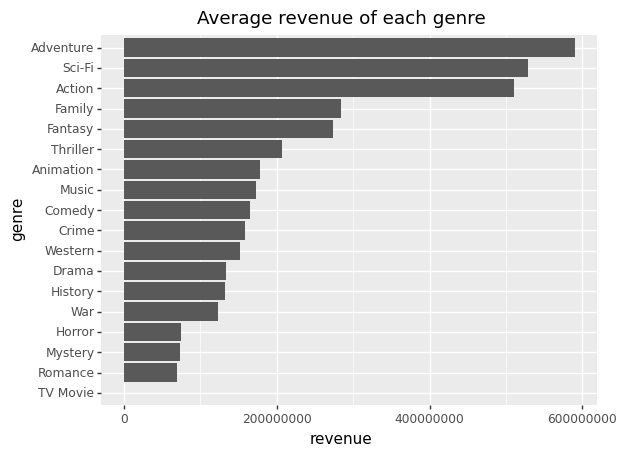

<ggplot: (8784895983312)>

In [143]:
genre_bo_list = ((df_sep_genre.groupby(['genre']).mean().sort_values(['revenue'], ascending=False)).index.to_list())[::-1] # Genre was ordered from highest to lowest
genre_bo_cat = (pd.Categorical(((df_sep_genre.groupby(['genre']).mean()).reset_index(inplace=False))['genre'], categories=genre_bo_list))
df_g_bo = (df_sep_genre.groupby(['genre']).mean()).assign(genre_bo_cat=genre_bo_cat)
ggplot(df_g_bo, aes(x="genre_bo_cat", y="revenue")) + geom_bar(stat='identity') + coord_flip() + scale_x_discrete() + labs(x='genre') + ggtitle('Average revenue of each genre')

In [236]:
df_rottom = pd.read_csv('df_rt_raw.csv')
df_rottom = df_rottom.drop('Unnamed: 0', axis='columns')
# Convert Rotten Tomatoes ratings from strings to integers (removing % sign)
list_rt_ratings = []
for i in df_rottom['user_rating'].to_list():
    list_rt_ratings.append(int(i.strip('%')))
list_rt_source_list = []
for i in range(294):
    list_rt_source_list.append('Rotten Tomatoes')

In [281]:
df_imdb = pd.read_csv('df_imdb.csv')
df_imdb = df_imdb.drop(columns='Unnamed: 0')
df_imdb.rename(columns = {'Title':'title', 'Director':'director', 'Revenue':'revenue', 'Year':'year', 'Genre':'genre', 'Source':'source','Votes':'votes', 'User_Rating':'user_rating', 'Length':'length'}, inplace = True)
df_imdb

,title,director,year,genre,revenue,user_rating,length,source,votes
0,The Shawshank Redemption,Frank Darabont,1994,['Drama '],28.34,93,142,IMDb,"250,000 votes and above"
1,The Godfather,Francis Ford Coppola,1972,"['Crime', ' Drama ']",134.97,92,175,IMDb,"250,000 votes and above"
2,The Dark Knight,Christopher Nolan,2008,"['Action', ' Crime', ' Drama ']",534.86,90,152,IMDb,"250,000 votes and above"
3,The Lord of the Rings: The Return of the King,Peter Jackson,2003,"['Action', ' Adventure', ' Drama ']",377.85,90,201,IMDb,"250,000 votes and above"
4,Schindler's List,Steven Spielberg,1993,"['Biography', ' Drama', ' History ']",96.90,90,195,IMDb,"250,000 votes and above"
...,...,...,...,...,...,...,...,...,...
245,Memories of Murder,Bong Joon Ho,2003,"['Crime', ' Drama', ' Mystery ']",0.01,81,131,IMDb,"50,000 to 100,000 votes"
246,Million Dollar Baby,Clint Eastwood,2004,"['Drama', ' Sport ']",100.49,81,132,IMDb,"50,000 to 100,000 votes"
247,Before Sunrise,Richard Linklater,1995,"['Drama', ' Romance ']",5.54,81,101,IMDb,"50,000 to 100,000 votes"
248,How to Train Your Dragon,Dean DeBlois,2010,"['Animation', ' Action', ' Adventure ...",217.58,81,98,IMDb,"50,000 to 100,000 votes"


In [277]:
df_rt = pd.read_csv('rt_df.csv')
df_rt = df_rt.drop(columns='Unnamed: 0')
df_rt = df_rt.rename(columns={'user_rating':'rating'})
df_rt

,title,revenue,rating,votes,year,source,genre,director,runtime_in_minutes
0,The Departure (2017 film),0.05,100,100+ Ratings,2017,RT,Documentary,['Lana Wilson'],87
1,The Woman Who Loves Giraffes (page does not ex...,0.04,100,Fewer than 50 Verified Ratings,2018,RT,Documentary,['Alison Reid'],83
2,Brother's Keeper (2022 film) (page does not ex...,133.90,100,Fewer than 50 Ratings,2021,RT,Drama,['Ferit Karahan'],85
3,Diana Kennedy: Nothing Fancy (page does not ex...,0.01,100,Fewer than 50 Ratings,2019,RT,Documentary,['Elizabeth Carroll'],73
4,"Sammy Davis, Jr.: I've Gotta Be Me (page does ...",2.70,100,Fewer than 50 Ratings,2017,RT,Documentary,['Samuel D. Pollard'],100
...,...,...,...,...,...,...,...,...,...
246,King Creole,5.21,82,"5,000+ Ratings",1958,RT,Musical,['Michael Curtiz'],116
247,Law of Desire,NaN,82,"5,000+ Ratings",1987,RT,Comedy,['Pedro Almodóvar'],100
248,Keep the Change (2018 film) (page does not exist),0.64,82,100+ Ratings,2017,RT,Romance,['Rachel Israel'],94
249,Kajaki (film),9.90,82,"2,500+ Ratings",2014,RT,War,['Paul Katis'],108


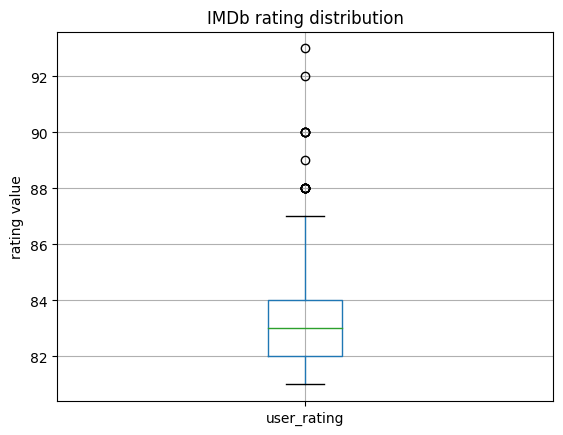

In [276]:
df_imdb.boxplot(['user_rating']).set_ylabel('rating value')
plt.title('IMDb rating distribution')
plt.show()

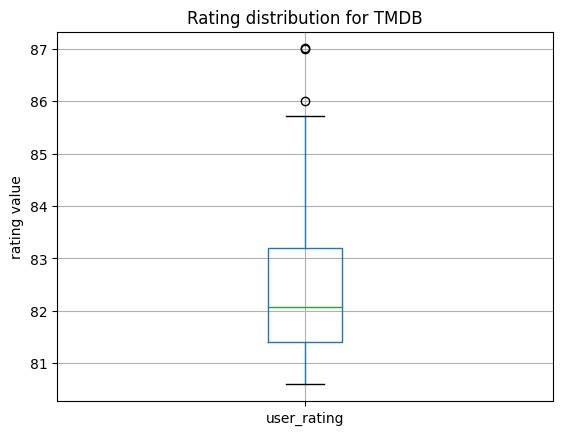

In [271]:
df.boxplot(['user_rating']).set_ylabel('rating value')
plt.title('Rating distribution for TMDB')

plt.show()

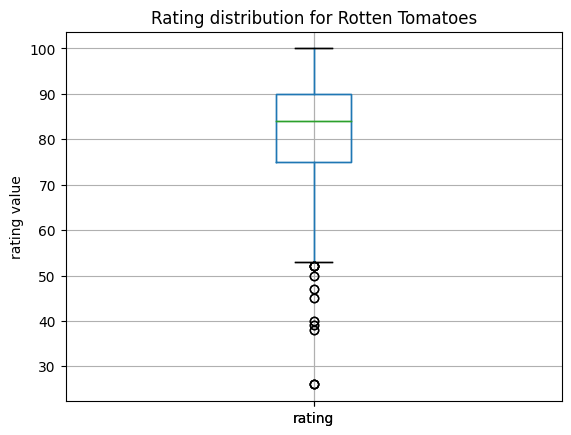

In [272]:
rt_rating = pd.DataFrame({'rating': list_rt_ratings}).boxplot()
plt.title('Rating distribution for Rotten Tomatoes')
(pd.DataFrame({'rating': list_rt_ratings}).boxplot()).set_ylabel('rating value')
plt.show()

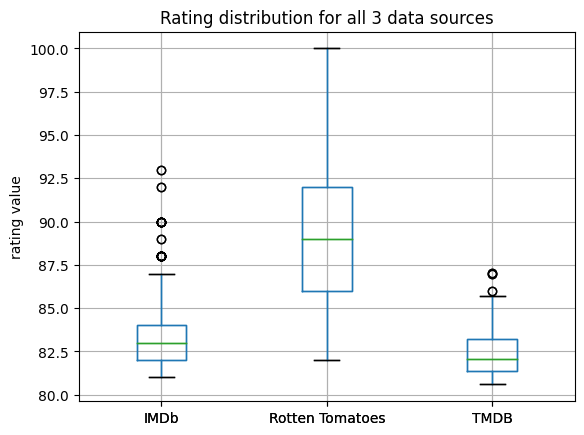

In [279]:
# rating value was cut to 80-100 from 0-100 to make the box plots look more clear
df_rt_rating_order = pd.read_csv('rt_df.csv')
df_rt_rating_order
df_rating = pd.DataFrame({'IMDb': df_imdb['user_rating'].to_list(), 'Rotten Tomatoes': df_rt_rating_order['user_rating'][:250].to_list(), 'TMDB': df['user_rating'].to_list()})
df_rating.boxplot()
plt.title('Rating distribution for all 3 data sources')
(df_rating.boxplot()).set_ylabel('rating value')
plt.show()

In [201]:
df_sep_directors['revenue'] = df_sep_directors['revenue'].div(1000000).round(2)
df_sep_directors

,Unnamed: 0,title,director,year,revenue,length,user_rating,source,votes,genre
0,0,The Godfather,Francis Ford Coppola,1972,245.07,175,87.11,TMDB,10000+ ratings,"['Drama', 'Crime']"
1,1,The Shawshank Redemption,Frank Darabont,1994,28.34,142,87.01,TMDB,10000+ ratings,"['Drama', 'Crime']"
2,2,The Godfather Part II,Francis Ford Coppola,1974,102.60,202,85.97,TMDB,10000+ ratings,"['Drama', 'Crime']"
3,3,Dilwale Dulhania Le Jayenge,Aditya Chopra,1995,100.00,190,85.71,TMDB,2500+ ratings,"['Comedy', 'Drama', 'Romance']"
4,4,Schindler's List,Steven Spielberg,1993,321.37,195,85.69,TMDB,10000+ ratings,"['Drama', 'History', 'War']"
...,...,...,...,...,...,...,...,...,...,...
261,245,"Toto, Peppino, and the Hussy",Camillo Mastrocinque,1956,NaN,101,80.60,TMDB,250+ ratings,"['Comedy', 'Romance']"
262,246,The Best of Youth,Marco Tullio Giordana,2003,2.69,366,80.60,TMDB,250+ ratings,"['Drama', 'History', 'Romance']"
263,247,El mesero,Raúl Martínez,2021,NaN,86,80.59,TMDB,250+ ratings,Comedy
264,248,The Elephant Man,David Lynch,1980,26.01,124,80.59,TMDB,2500+ ratings,"['Drama', 'History']"


In [205]:
df_rt_to = pd.DataFrame({'title':(df_rt['title'].to_list()), 'director':(df_rt['director'].to_list()), 'genre':df_rt['genre'].to_list(), 'rating': df_rt['rating'].to_list(), 'source': list_rt_source_list, 'votes': df_rt['votes'].to_list(), 'year':df_rt['year'].to_list(), 'revenue': df_rt['revenue'].to_list()})
df_rt_to

,title,director,genre,rating,source,votes,year,revenue
0,Chained for Life (2019 film),Aaron Schimberg,Drama,54,Rotten Tomatoes,Fewer than 50 Ratings,2019,0.02
1,Off the Rails (2016 film),Adam Irving,Documentary,85,Rotten Tomatoes,100+ Ratings,2016,0.07
2,For the Love of Spock,Adam Nimoy,Documentary,82,Rotten Tomatoes,"1,000+ Ratings",2016,19.34
3,Vagabond (1985 film),Agnès Varda,Drama,85,Rotten Tomatoes,"1,000+ Ratings",1985,29.94
4,John Mulaney: Kid Gorgeous at Radio City,Alex Timbers,Comedy,90,Rotten Tomatoes,100+ Ratings,2018,1.56
...,...,...,...,...,...,...,...,...
289,Sleeper (1973 film),Woody Allen,Comedy,81,Rotten Tomatoes,"25,000+ Ratings",1973,102.20
290,Horror Noire,Xavier Burgin,Documentary,67,Rotten Tomatoes,50+ Ratings,2019,1.51
291,Strong Island (film),Yance Ford,Documentary,56,Rotten Tomatoes,500+ Ratings,2017,0.01
292,Seoul Station (film),Yeon Sang-ho,Horror,38,Rotten Tomatoes,250+ Ratings,2016,2.57


In [206]:
df = pd.read_csv('tmdb_raw_data.csv')
df.rename(columns = {'movie':'title', 'box office':'revenue', 'release year':'year', 'data source':'source','users voted':'votes', 'rating':'rating'}, inplace = True)
df = df.drop(columns=['Unnamed: 0'], axis=1)
df


,title,director,year,genre,revenue,user_rating,length,source,votes
0,The Godfather,Francis Ford Coppola,1972,"['Drama', 'Crime']",245.066411,87.00,175,TMDB,10000+ ratings
1,The Shawshank Redemption,Frank Darabont,1994,"['Drama', 'Crime']",28.341469,87.01,142,TMDB,10000+ ratings
2,The Godfather Part II,Francis Ford Coppola,1974,"['Drama', 'Crime']",102.600000,86.00,202,TMDB,10000+ ratings
3,Dilwale Dulhania Le Jayenge,Aditya Chopra,1995,"['Comedy', 'Drama', 'Romance']",100.000000,85.71,190,TMDB,2500+ ratings
4,Schindler's List,Steven Spielberg,1993,"['Drama', 'History', 'War']",321.365567,85.70,195,TMDB,10000+ ratings
...,...,...,...,...,...,...,...,...,...
245,"Toto, Peppino, and the Hussy",Camillo Mastrocinque,1956,"['Comedy', 'Romance']",NaN,80.60,101,TMDB,250+ ratings
246,The Best of Youth,Marco Tullio Giordana,2003,"['Drama', 'History', 'Romance']",2.693053,80.60,366,TMDB,250+ ratings
247,El mesero,Raúl Martínez,2021,Comedy,NaN,80.59,86,TMDB,250+ ratings
248,The Elephant Man,David Lynch,1980,"['Drama', 'History']",26.010864,81.00,124,TMDB,2500+ ratings


In [208]:
df_sep_directors = pd.read_csv('tmb_dir_sep.csv')
df_sep_directors = df_sep_directors.drop(columns=['Unnamed: 0'])
df_sep_directors.rename(columns = {'movie':'title', 'box office':'revenue', 'release year':'year', 'data source':'source','users voted':'votes', 'rating':'rating'}, inplace = True)
df_sep_directors['revenue'] = df_sep_directors['revenue'].div(1000000).round(2)
df_sep_directors
# rename rows to make them consistent

,title,director,year,revenue,length,user_rating,source,votes,genre
0,The Godfather,Francis Ford Coppola,1972,245.07,175,87.11,TMDB,10000+ ratings,"['Drama', 'Crime']"
1,The Shawshank Redemption,Frank Darabont,1994,28.34,142,87.01,TMDB,10000+ ratings,"['Drama', 'Crime']"
2,The Godfather Part II,Francis Ford Coppola,1974,102.60,202,85.97,TMDB,10000+ ratings,"['Drama', 'Crime']"
3,Dilwale Dulhania Le Jayenge,Aditya Chopra,1995,100.00,190,85.71,TMDB,2500+ ratings,"['Comedy', 'Drama', 'Romance']"
4,Schindler's List,Steven Spielberg,1993,321.37,195,85.69,TMDB,10000+ ratings,"['Drama', 'History', 'War']"
...,...,...,...,...,...,...,...,...,...
261,"Toto, Peppino, and the Hussy",Camillo Mastrocinque,1956,NaN,101,80.60,TMDB,250+ ratings,"['Comedy', 'Romance']"
262,The Best of Youth,Marco Tullio Giordana,2003,2.69,366,80.60,TMDB,250+ ratings,"['Drama', 'History', 'Romance']"
263,El mesero,Raúl Martínez,2021,NaN,86,80.59,TMDB,250+ ratings,Comedy
264,The Elephant Man,David Lynch,1980,26.01,124,80.59,TMDB,2500+ ratings,"['Drama', 'History']"


In [239]:
# get the RT dataframe that's separated by director
df_rt = pd.read_csv('df_rt_sep_dir.csv')
df_rt = df_rt.drop(columns='Unnamed: 0')
df_rt = df_rt.rename(columns={'user_rating':'rating'})
df_rt

,title,revenue,rating,votes,year,source,genre,director
0,Chained for Life (2019 film),0.02,54%,Fewer than 50 Ratings,2019,RT,Drama,Aaron Schimberg
1,Off the Rails (2016 film),0.07,85%,100+ Ratings,2016,RT,Documentary,Adam Irving
2,For the Love of Spock,19.34,82%,"1,000+ Ratings",2016,RT,Documentary,Adam Nimoy
3,Vagabond (1985 film),29.94,85%,"1,000+ Ratings",1985,RT,Drama,Agnès Varda
4,John Mulaney: Kid Gorgeous at Radio City,1.56,90%,100+ Ratings,2018,RT,Comedy,Alex Timbers
...,...,...,...,...,...,...,...,...
289,Sleeper (1973 film),102.20,81%,"25,000+ Ratings",1973,RT,Comedy,Woody Allen
290,Horror Noire,1.51,67%,50+ Ratings,2019,RT,Documentary,Xavier Burgin
291,Strong Island (film),0.01,56%,500+ Ratings,2017,RT,Documentary,Yance Ford
292,Seoul Station (film),2.57,38%,250+ Ratings,2016,RT,Horror,Yeon Sang-ho


In [240]:
list_rt_ratings = []
for i in df_rt['rating'].to_list():
    list_rt_ratings.append(int(i.strip('%')))
df_rt['rating'] = list_rt_ratings

In [241]:
df_concat = pd.concat([df_sep_directors.rename(columns={'user_rating':'rating'}), df_imdb, df_rt])
df_concat = df_concat.drop(columns=['length'])
df_concat

,title,director,year,revenue,rating,source,votes,genre
0,The Godfather,Francis Ford Coppola,1972,245.07,87.11,TMDB,10000+ ratings,"['Drama', 'Crime']"
1,The Shawshank Redemption,Frank Darabont,1994,28.34,87.01,TMDB,10000+ ratings,"['Drama', 'Crime']"
2,The Godfather Part II,Francis Ford Coppola,1974,102.60,85.97,TMDB,10000+ ratings,"['Drama', 'Crime']"
3,Dilwale Dulhania Le Jayenge,Aditya Chopra,1995,100.00,85.71,TMDB,2500+ ratings,"['Comedy', 'Drama', 'Romance']"
4,Schindler's List,Steven Spielberg,1993,321.37,85.69,TMDB,10000+ ratings,"['Drama', 'History', 'War']"
...,...,...,...,...,...,...,...,...
289,Sleeper (1973 film),Woody Allen,1973,102.20,81.00,RT,"25,000+ Ratings",Comedy
290,Horror Noire,Xavier Burgin,2019,1.51,67.00,RT,50+ Ratings,Documentary
291,Strong Island (film),Yance Ford,2017,0.01,56.00,RT,500+ Ratings,Documentary
292,Seoul Station (film),Yeon Sang-ho,2016,2.57,38.00,RT,250+ Ratings,Horror


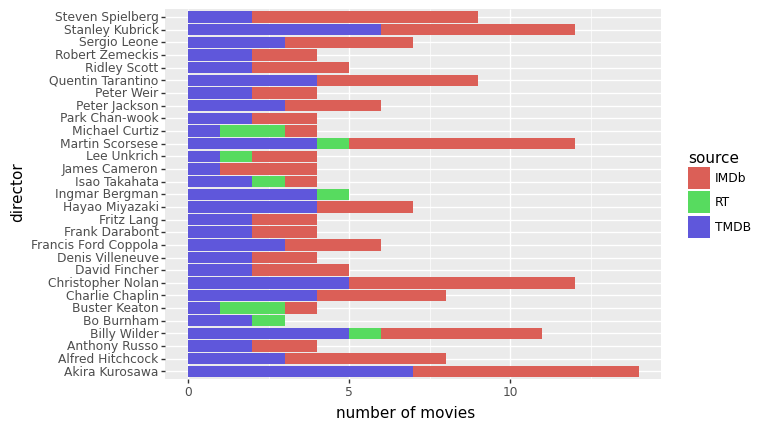

<ggplot: (8784896363496)>

In [242]:
# Getting the 30 directors who did the most films in all sources, then showing how many times they appear in each source
df_top_30_directors_all = (df_concat.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(30).sort_values('source', ascending=False)
df_top_30_directors_all['director'] = pd.Categorical((df_top_30_directors_all)['director'], categories=df_top_30_directors_all['director'][::-1])
df_top_30_directors_all
top_30_directors_list = df_top_30_directors_all['director'].to_list()
list_top30_directors_dfs = []
for i in range(30):
    a=df_concat.loc[df_concat['director']==top_30_directors_list[i]]
    list_top30_directors_dfs.append(a)
top_30_directors = pd.concat(list_top30_directors_dfs)
top_30_directors =  top_30_directors.replace('Charles Chaplin', 'Charlie Chaplin')
ggplot(top_30_directors, aes(x='director', fill='source'))+ \
geom_bar() + \
labs(x='director', y='number of movies')  + \
coord_flip() + \
scale_x_discrete() + \
ggtitle('')

Rotten Tomatoes is very underrepresented here.

/var/folders/sk/p0bpqc995x910krmdwnwxsy00000gn/T/ipykernel_5458/1859389912.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


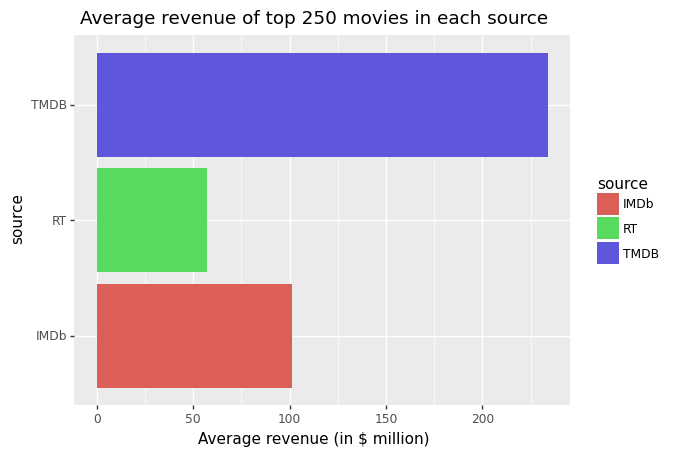

<ggplot: (8784880389672)>

In [243]:
ggplot(df_concat.groupby(['source']).mean().reset_index(inplace=False), aes(x='source', y='revenue', fill='source'))+ \
geom_bar(stat='identity') + \
labs(x='source', y='Average revenue (in $ million)')  + \
coord_flip() + \
scale_x_discrete() + \
ggtitle('Average revenue of top 250 movies in each source')

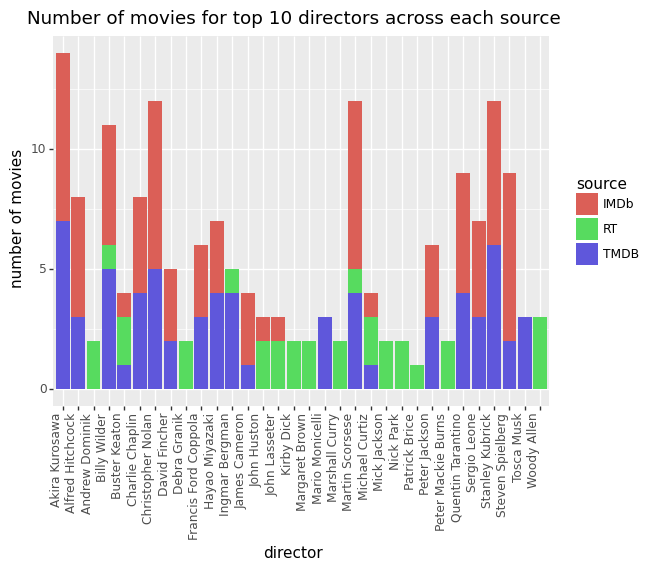

<ggplot: (8784844725062)>

In [244]:
# Get top 10 directors with most number of films from each source (removing duplicates), then showing how many films they did in each source
top_10_directors_tmdb = (df_sep_directors.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(14).sort_values('source', ascending=False)
top_10_directors_imdb = (df_imdb.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(14).sort_values('source', ascending=False)
top_10_directors_rt = (df_rt.groupby('director')['source'].count().sort_values(ascending=False).reset_index(inplace=False, drop=False)).head(14).sort_values('source', ascending=False)
top_10_directors_rt
list_top10_each_source = top_10_directors_tmdb['director'].to_list() + top_10_directors_imdb['director'].to_list() + top_10_directors_rt['director'].to_list()
list_top10_each_source = list(dict.fromkeys(list_top10_each_source))
list_top10_each_source_dfs = []
for i in range(len(list_top10_each_source)):
    a=df_concat.loc[df_concat['director']==list_top10_each_source[i]]
    list_top10_each_source_dfs.append(a)
top_10_directors_each_source = pd.concat(list_top10_each_source_dfs)
top_10_directors_each_source = top_10_directors_each_source.replace('Charles Chaplin', 'Charlie Chaplin')
ggplot(top_10_directors_each_source, aes(x='director', fill='source'))+ \
geom_bar() + \
labs(x='director', y='number of movies')  + \
scale_x_discrete() + \
ggtitle('Number of movies for top 10 directors across each source') + \
theme(axis_text_x=element_text(rotation=90, hjust=1))